In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

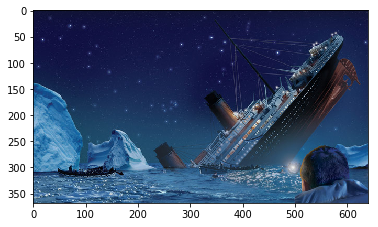

In [2]:
im = Image.open(r'E:\kaggle_games\titanic\Data\images\titanic-disaster.jpg')
plt.imshow(im)

In [3]:
tr_data = pd.read_csv(r'E:\kaggle_games\titanic\Data\input\train.csv')
te_data = pd.read_csv(r'E:\kaggle_games\titanic\Data\input\test.csv')

In [4]:
tr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
tr_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 数据预处理
# 思路一、对缺省值进行补充或删除（Age、Carbin、Embarked）
# 思路二、将tr_data中的Survived单独取出，作为标签，看其余每列与标签的关联关系
# 思路三、将Sex进行编码
# 思路四、将Name，Ticket, PassengerId去掉
tr_label = tr_data['Survived']
tr_feature = tr_data.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1)

In [8]:
tr_feature.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
sex_mappig = {'male':0, 'female':1}
tr_feature['Sex'] = tr_feature['Sex'].map(sex_mappig)

In [10]:
tr_feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S
5,3,0,NaN,0,0,8.4583,Q
6,1,0,54.0,0,0,51.8625,S
7,3,0,2.0,3,1,21.0750,S
8,3,1,27.0,0,2,11.1333,S
9,2,1,14.0,1,0,30.0708,C


In [11]:
tr_feature['Age'] = tr_feature['Age'].fillna(tr_feature['Age'].median())

In [12]:
tr_feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S
5,3,0,28.0,0,0,8.4583,Q
6,1,0,54.0,0,0,51.8625,S
7,3,0,2.0,3,1,21.0750,S
8,3,1,27.0,0,2,11.1333,S
9,2,1,14.0,1,0,30.0708,C


In [13]:
tr_feature['Age'].median()

28.0

In [14]:
def age_encoder(age):
    res = []
    for i in age:
        if i <=18:
            res.append(0)
        elif 18 < i <=60:
            res.append(1)
        else:
            res.append(2)
    return res

In [15]:
tr_feature['Age'] = age_encoder(tr_feature['Age'])

In [16]:
tr_feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,3,1,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,3,0,1,0,0,8.0500,S
5,3,0,1,0,0,8.4583,Q
6,1,0,1,0,0,51.8625,S
7,3,0,0,3,1,21.0750,S
8,3,1,1,0,2,11.1333,S
9,2,1,0,1,0,30.0708,C


In [17]:
tr_feature['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
tr_feature['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
def sibsp_encoder(sibsp):
    res = []
    for i in sibsp:
        if i == 0:
            res.append(0)
        elif i == 1:
            res.append(1)
        elif i == 2:
            res.append(2)
        else:
            res.append(3)
    return res

In [20]:
tr_feature['SibSp'] = sibsp_encoder(tr_feature['SibSp'])

In [21]:
def parch_encoder(parch):
    res = []
    for i in parch:
        if i == 0:
            res.append(0)
        elif i == 1:
            res.append(1)
        elif i == 2:
            res.append(2)
        else:
            res.append(3)
    return res

In [22]:
tr_feature['Parch'] = parch_encoder(tr_feature['Parch'])

In [23]:
tr_feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,3,1,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,3,0,1,0,0,8.0500,S
5,3,0,1,0,0,8.4583,Q
6,1,0,1,0,0,51.8625,S
7,3,0,0,3,1,21.0750,S
8,3,1,1,0,2,11.1333,S
9,2,1,0,1,0,30.0708,C


In [24]:
tr_feature['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
tr_feature['Embarked'] = tr_feature['Embarked'].fillna('S')

In [26]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
tr_feature['Embarked'] = tr_feature['Embarked'].map(embarked_mapping)

In [27]:
tr_feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,3,1,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,3,0,1,0,0,8.0500,0
5,3,0,1,0,0,8.4583,2
6,1,0,1,0,0,51.8625,0
7,3,0,0,3,1,21.0750,0
8,3,1,1,0,2,11.1333,0
9,2,1,0,1,0,30.0708,1


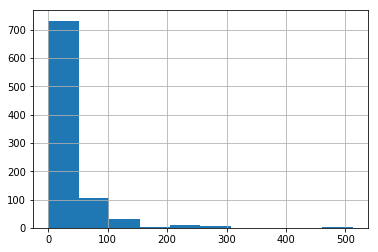

In [28]:
tr_feature['Fare'].hist(bins=10)

In [29]:
def fare_encoder(fare):
    res = []
    for i in fare:
        if i <= 50:
            res.append(0)
        elif 50 < i <= 100:
            res.append(1)
        else:
            res.append(2)
    return res

In [30]:
tr_feature['Fare'] = fare_encoder(tr_feature['Fare'])

In [31]:
tr_feature.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0,0
1,1,1,1,1,0,1,1
2,3,1,1,0,0,0,0
3,1,1,1,1,0,1,0
4,3,0,1,0,0,0,0
5,3,0,1,0,0,0,2
6,1,0,1,0,0,1,0
7,3,0,0,3,1,0,0
8,3,1,1,0,2,0,0
9,2,1,0,1,0,0,1


In [32]:
te_feature = te_data.drop(['Name', 'Cabin', 'Ticket'], axis=1)

te_feature['Sex'] = te_feature['Sex'].map(sex_mappig)

te_feature['Age'] = te_feature['Age'].fillna(te_feature['Age'].median())

te_feature['Age'] = age_encoder(te_feature['Age'])

te_feature['SibSp'] = sibsp_encoder(te_feature['SibSp'])

te_feature['Parch'] = parch_encoder(te_feature['Parch'])

te_feature['Embarked'] = te_feature['Embarked'].fillna('S')

te_feature['Embarked'] = te_feature['Embarked'].map(embarked_mapping)

te_feature['Fare'] = fare_encoder(te_feature['Fare'])

In [33]:
te_feature.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,1,0,0,0,2
1,893,3,1,1,1,0,0,0
2,894,2,0,2,0,0,0,2
3,895,3,0,1,0,0,0,0
4,896,3,1,1,1,1,0,0
5,897,3,0,0,0,0,0,0
6,898,3,1,1,0,0,0,2
7,899,2,0,1,1,1,0,0
8,900,3,1,0,0,0,0,1
9,901,3,0,1,2,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tr_feature, tr_label, test_size=0.3, random_state=0)

In [35]:
# 支持向量机
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_predict = clf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
print(accuracy_score(y_test, y_predict))

0.7873134328358209


In [39]:
print(confusion_matrix(y_test, y_predict))

[[140  28]
 [ 29  71]]


In [40]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       168
          1       0.72      0.71      0.71       100

avg / total       0.79      0.79      0.79       268



In [41]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=4)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
y_predict1 = clf1.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_predict1))

0.8059701492537313


In [44]:
print(confusion_matrix(y_test, y_predict1))

[[157  11]
 [ 41  59]]


In [45]:
print(classification_report(y_test, y_predict1))

             precision    recall  f1-score   support

          0       0.79      0.93      0.86       168
          1       0.84      0.59      0.69       100

avg / total       0.81      0.81      0.80       268



In [46]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_predict2 = clf2.predict(X_test)

In [48]:
print(accuracy_score(y_test, y_predict2))

0.7947761194029851


In [49]:
print(confusion_matrix(y_test, y_predict2))

[[145  23]
 [ 32  68]]


In [50]:
print(classification_report(y_test, y_predict2))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       168
          1       0.75      0.68      0.71       100

avg / total       0.79      0.79      0.79       268



In [51]:
# 集成模型Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(n_estimators=50, random_state=0)
clf3.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [52]:
y_predict3 = clf3.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_predict3))

0.7985074626865671


In [54]:
clf3.feature_importances_

array([0.26, 0.08, 0.08, 0.18, 0.2 , 0.12, 0.08])

In [55]:
# 集成模型randomforest
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=0)
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
y_predict4 = clf4.predict(X_test)

In [57]:
print(accuracy_score(y_test, y_predict4))

0.8022388059701493


In [58]:
clf4.feature_importances_

array([0.18486726, 0.57974284, 0.03480364, 0.06399121, 0.04557841,
       0.05934204, 0.0316746 ])

In [59]:
# 提高精度的思路：
# 思路一、Carbin列将缺省值赋值为0，其余的为1；
# 思路二、对于Age列中的缺省值按以下方式填充：根据乘客的称谓进行分类，以分类的年龄平均数进行缺失值的填充；
# 思路三、对于Pclass、Sex、Embarked三列进行独热编码（pd.ger_dummies）；
# 思路四、对Name列进行提取如Mr、Miss、Mrs、Dr、Master等特征，增加为Title列；增加Isalone特征；
# 思路五、试试卡方检测，看看什么特征比较重要（SelectKBest(chi2, k=10).fit_transform(X, y)）
